# Handwritten Text Recognition System

In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import tensorflow_datasets as tfds

## Load the EMNIST dataset

In [25]:
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

## Function to normalize and flatten the images

In [26]:
# Function to normalize the images
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


## Preprocess the datasets

In [27]:
ds_train = ds_train.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)


## Collect the normalized images and labels from the train and test sets


In [28]:
train_images = []
train_labels = []
for image, label in ds_train.unbatch():
    train_images.append(image.numpy())
    train_labels.append(label.numpy())

test_images = []
test_labels = []
for image, label in ds_test.unbatch():
    test_images.append(image.numpy())
    test_labels.append(label.numpy())

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


## Flatten the images for training the model


In [29]:
train_images_flattened = train_images.reshape(len(train_images), 28*28)
test_images_flattened = test_images.reshape(len(test_images), 28*28)


In [30]:
train_images_flattened[10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Map numerical labels to characters for EMNIST dataset

In [31]:
emnist_mapping = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd',
    40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n',
    50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x',
    60: 'y', 61: 'z'
}

## Build the model


In [32]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(62, activation='softmax')  # 62 classes in the balanced EMNIST dataset
])


C:\Users\SABESH KRISHNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model


In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



## Train the model


In [34]:
model.fit(train_images_flattened, train_labels, epochs=10)


Epoch 1/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5861 - loss: 1.5322
Epoch 2/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7710 - loss: 0.7551
Epoch 3/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8028 - loss: 0.6170
Epoch 4/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8191 - loss: 0.5581
Epoch 5/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8315 - loss: 0.5176
Epoch 6/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8386 - loss: 0.4889
Epoch 7/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8438 - loss: 0.4649
Epoch 8/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8490 - loss: 0.4458
Epoch 9/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8508 - loss: 0.4393
Epoch 10/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8547 - loss: 0.4253


## Evaluate the model


In [35]:
loss, accuracy = model.evaluate(test_images_flattened, test_labels)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8199 - loss: 0.5818
Model Accuracy: 81.88%


## Collect the images and labels from the test set


In [36]:
ds_test_images = []
ds_test_labels = []
for image, label in ds_test.unbatch():
    ds_test_images.append(image.numpy())
    ds_test_labels.append(label.numpy())

ds_test_images = np.array(ds_test_images)
ds_test_labels = np.array(ds_test_labels)


## Make predictions


In [37]:
y_predicted = model.predict(test_images_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [43]:
image_index = 78  # Define the image index
print(f"Predicted label: {y_predicted_labels[image_index]}")
print(f"Actual label: {emnist_mapping[test_labels[image_index]]}")


Predicted label: 10
Actual label: A


## Plot some predictions


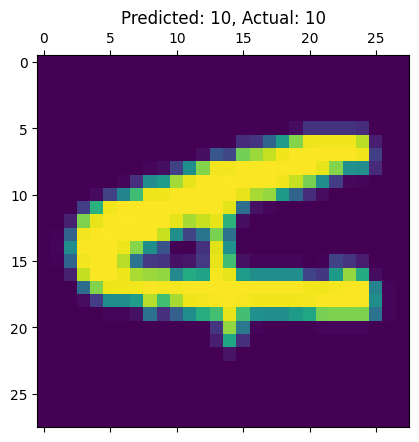

In [44]:
plt.matshow(ds_test_images[image_index].reshape(28, 28))
plt.title(f"Predicted: {y_predicted_labels[image_index]}, Actual: {ds_test_labels[image_index]}")
plt.show()

In [52]:
print(f"VALUE : {emnist_mapping[y_predicted_labels[image_index]]}")

VALUE : A


In [45]:
ds_test_images[image_index]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Confusion matrix


In [46]:
cm = tf.math.confusion_matrix(labels=ds_test_labels, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(47, 47), dtype=int32, numpy=
array([[264,   0,   0, ...,   0,   1,   0],
       [  0, 157,   0, ...,   0,   2,   1],
       [  0,   0, 350, ...,   2,   0,   0],
       ...,
       [  0,   0,   1, ..., 145,   0,   3],
       [  0,   1,   0, ...,   0, 360,   6],
       [  0,   0,   1, ...,   0,   5, 331]])>

## Plot the confusion matrix


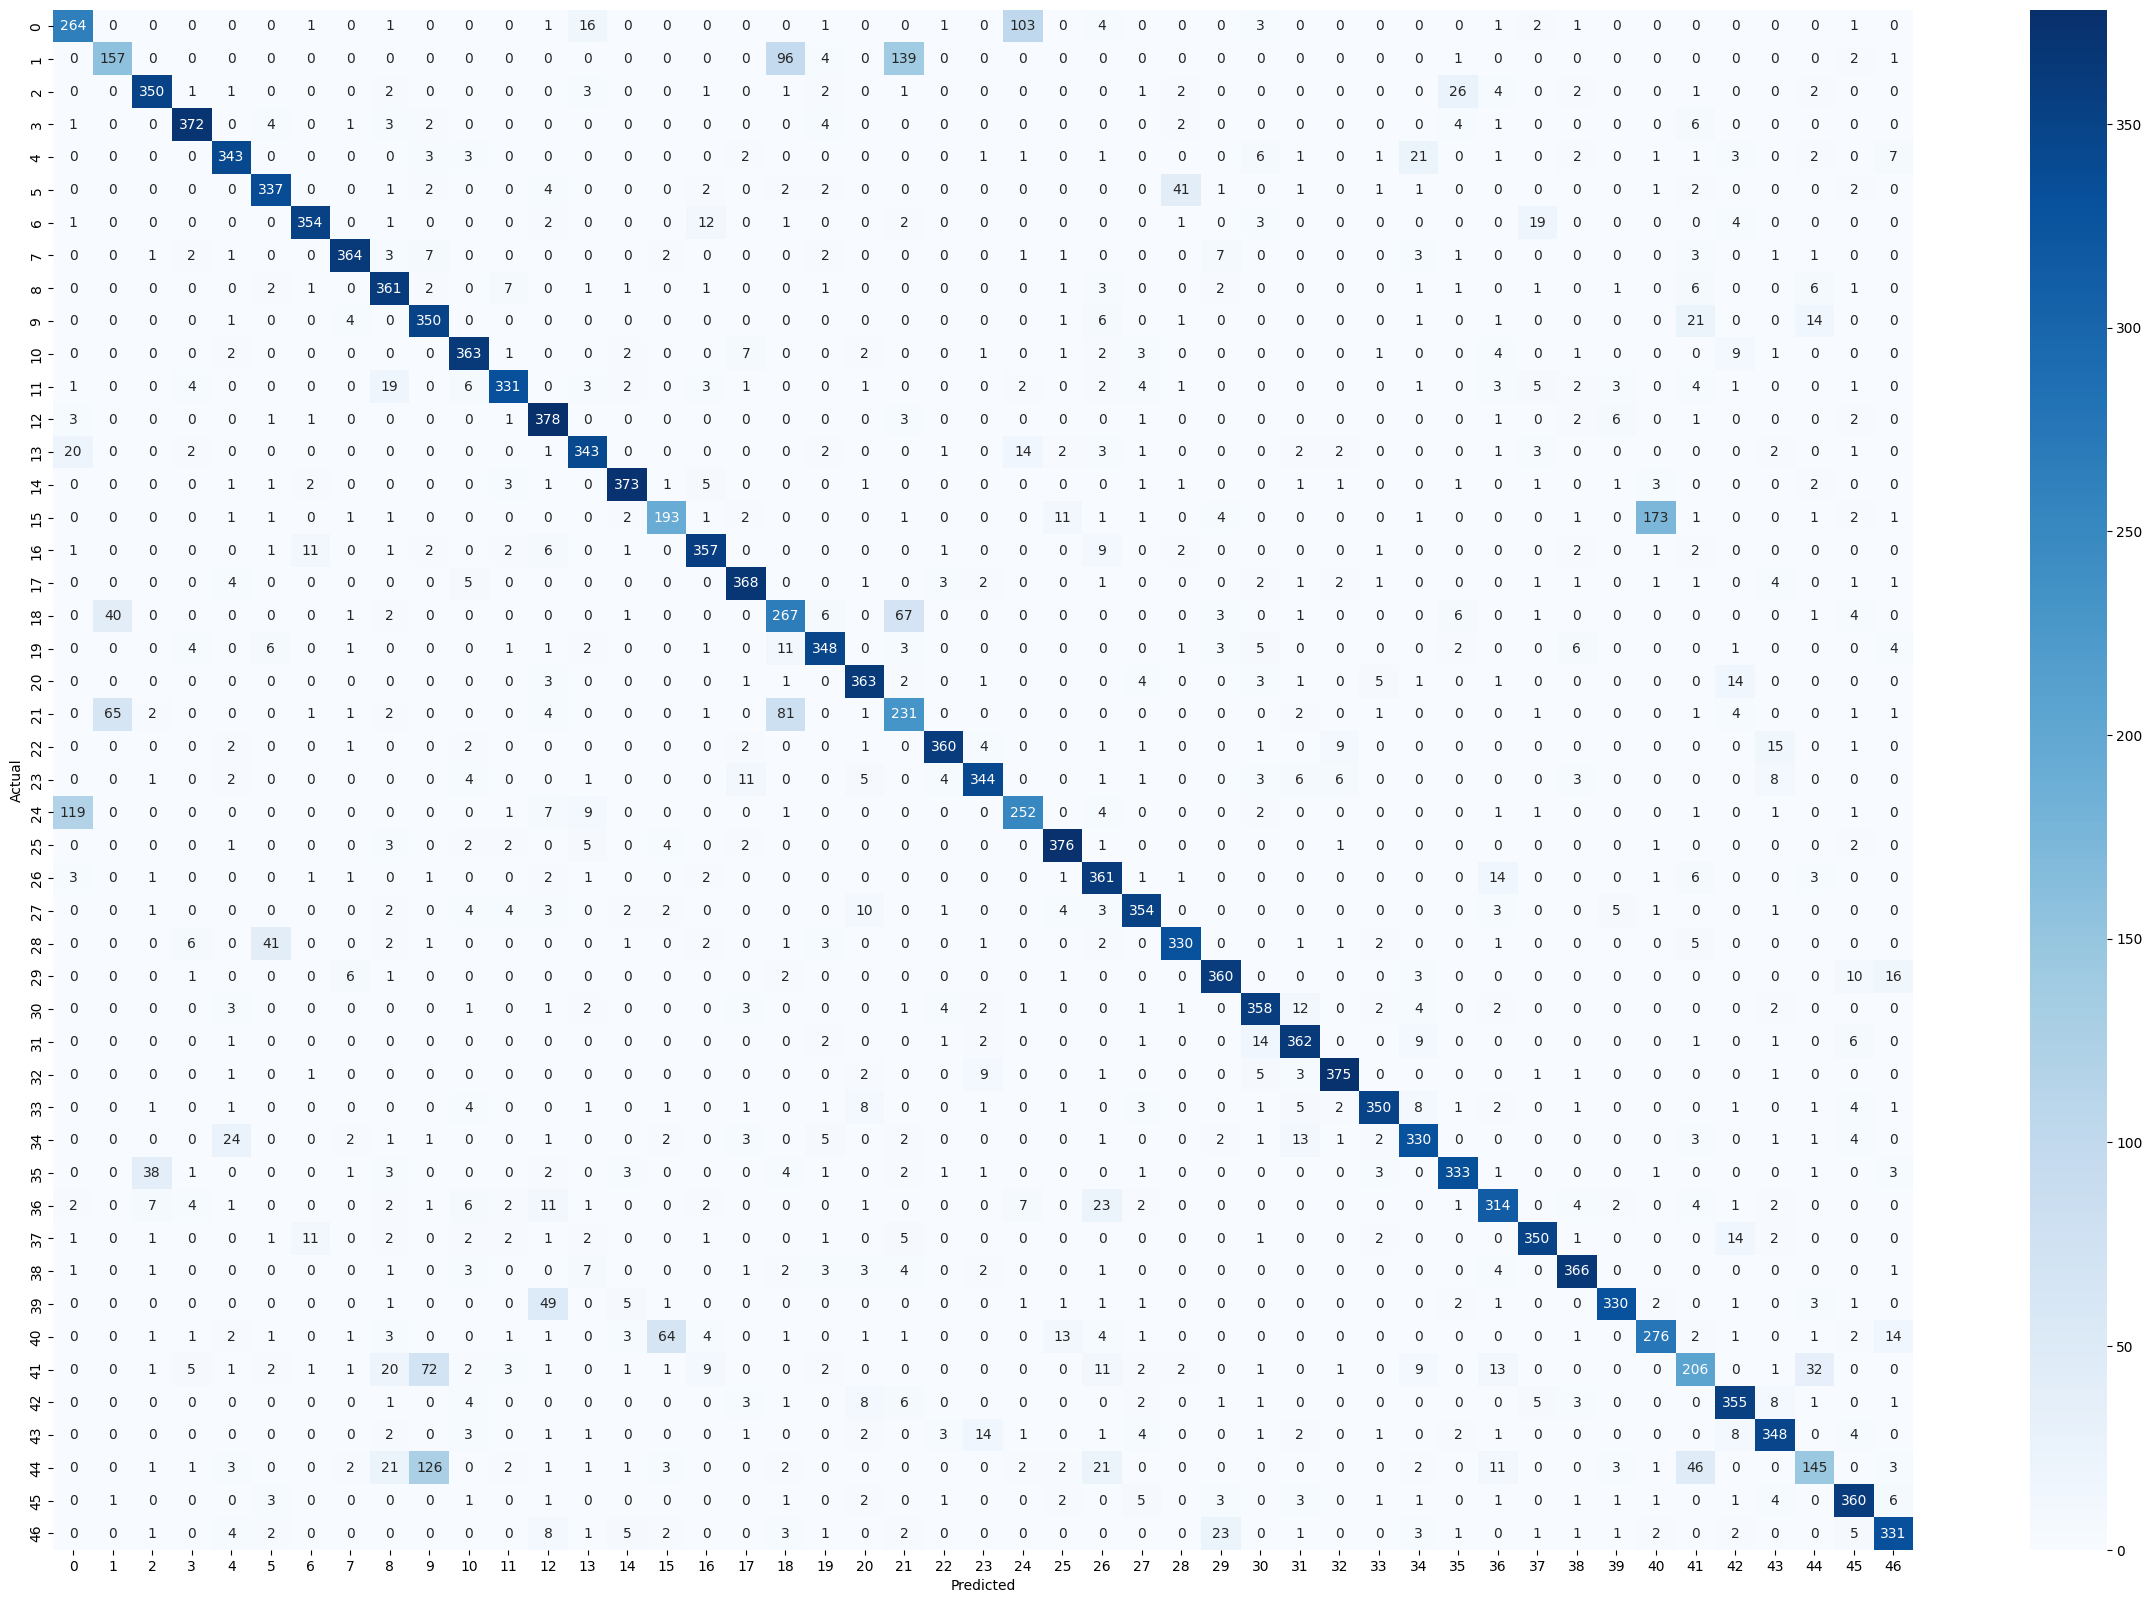

In [50]:
plt.figure(figsize=(30, 20))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()